In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

train= pd.read_csv("/content/train.csv")

#train.head()

train.describe()


train.NumberOfDependents.isnull().value_counts(normalize=1)

train.NumberOfDependents.head()

train.NumberOfDependents.fillna(train.NumberOfDependents.mean())

train.NumberOfDependents.replace(to_replace =np.nan , value =train.NumberOfDependents.mean(), inplace= True)
train.MonthlyIncome.replace(np.nan , train.MonthlyIncome.mean(), inplace=True)
train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         150000 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [ ]:
train.NumberOfDependents

array([ 2.,  1.,  0., nan,  3.,  4.,  5.,  6.,  8.,  7., 20., 10.,  9.,
       13.])

In [ ]:
#train.SeriousDlqin2yrs.value_counts(normalize=True)

#sns.distplot(train.SeriousDlqin2yrs)
newcol=[]
for i in range(len(train.columns)):
  newcol.append(train.columns[i].replace("-","").lower())
train.columns=newcol


In [ ]:
print(train.columns[11])
train.info()

# renaming column --- data.rename(columns={'gdp':'log(gdp)'}, inplace=True)


# Graphucal representation of missing values

x = train.columns
y = train.isnull().sum()
sns.set()
sns.barplot(x,y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            int(height),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
sns.set(rc={'figure.figsize':(8,8)})
ax.set_xlabel("Data Attributes")
ax.set_ylabel("count of missing records for each attribute")
plt.xticks(rotation=90)
plt.show()

numberofdependents
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   unnamed: 0                            150000 non-null  int64  
 1   seriousdlqin2yrs                      150000 non-null  int64  
 2   revolvingutilizationofunsecuredlines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   numberoftime3059dayspastduenotworse   150000 non-null  int64  
 5   debtratio                             150000 non-null  float64
 6   monthlyincome                         150000 non-null  float64
 7   numberofopencreditlinesandloans       150000 non-null  int64  
 8   numberoftimes90dayslate               150000 non-null  int64  
 9   numberrealestateloansorlines          150000 non-null  int64  
 10  numberoftime6089dayspastduenotworse   150000 non-

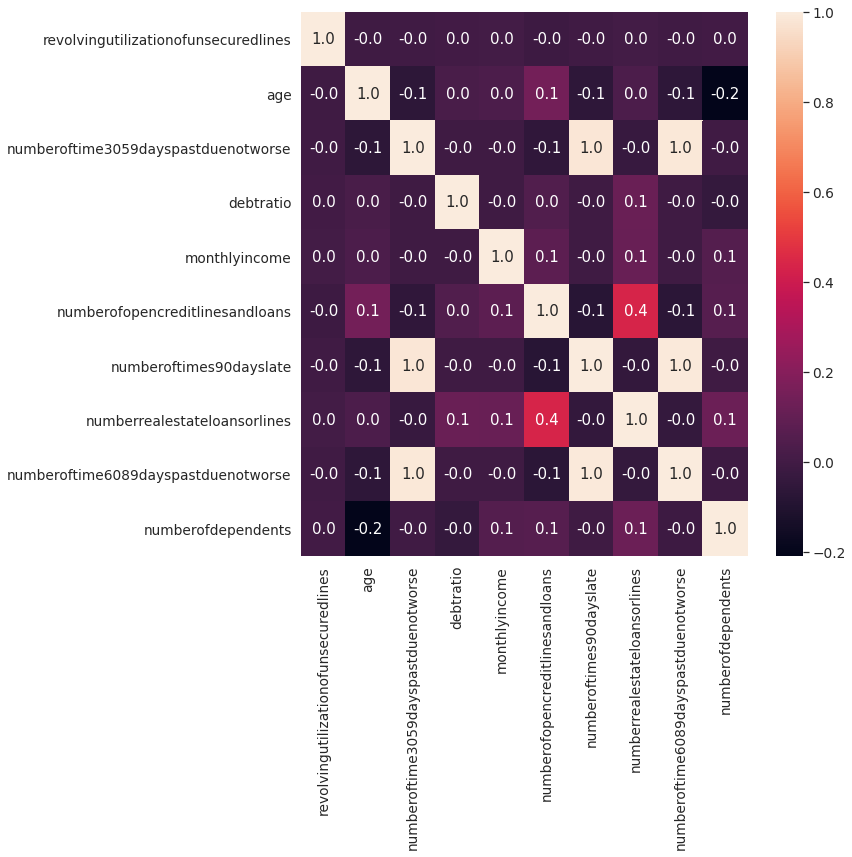

In [ ]:
#correlation


sns.set()
sns.set(font_scale=1.25)
sns.heatmap(train.iloc[:,2:].corr(),annot=True,fmt=".1f")
sns.set(rc={'figure.figsize':(20,20)})
plt.show()

In [ ]:
#dropping multiple columns
train_new=train[train.columns.drop("age")]

train_new.describe()

,unnamed: 0,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,6.048438,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,4.192781,2037.818523,1.288045e+04,5.145951,4.169304,1.129771,4.155179,1.100404
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,0.000000,0.366508,6.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [ ]:
dropping=('unnamed: 0')
x=train.drop(dropping,axis=1)
y=train.seriousdlqin2yrs

x.columns

features_label = train.columns[1:]



Index(['seriousdlqin2yrs', 'revolvingutilizationofunsecuredlines', 'age',
       'numberoftime3059dayspastduenotworse', 'debtratio', 'monthlyincome',
       'numberofopencreditlinesandloans', 'numberoftimes90dayslate',
       'numberrealestateloansorlines', 'numberoftime6089dayspastduenotworse',
       'numberofdependents'],
      dtype='object')

[8.57349974e-01 3.83323517e-02 4.24912178e-03 2.54887067e-02
 2.53736486e-03 2.15376246e-03 1.88843120e-03 4.74869428e-02
 1.02437144e-03 1.89021868e-02 5.86786368e-04]
 1) seriousdlqin2yrs               0.857350
 2) revolvingutilizationofunsecuredlines 0.047487
 3) age                            0.038332
 4) numberoftime3059dayspastduenotworse 0.025489
 5) debtratio                      0.018902
 6) monthlyincome                  0.004249
 7) numberofopencreditlinesandloans 0.002537
 8) numberoftimes90dayslate        0.002154
 9) numberrealestateloansorlines   0.001888
10) numberoftime6089dayspastduenotworse 0.001024
11) numberofdependents             0.000587


NameError: ignored

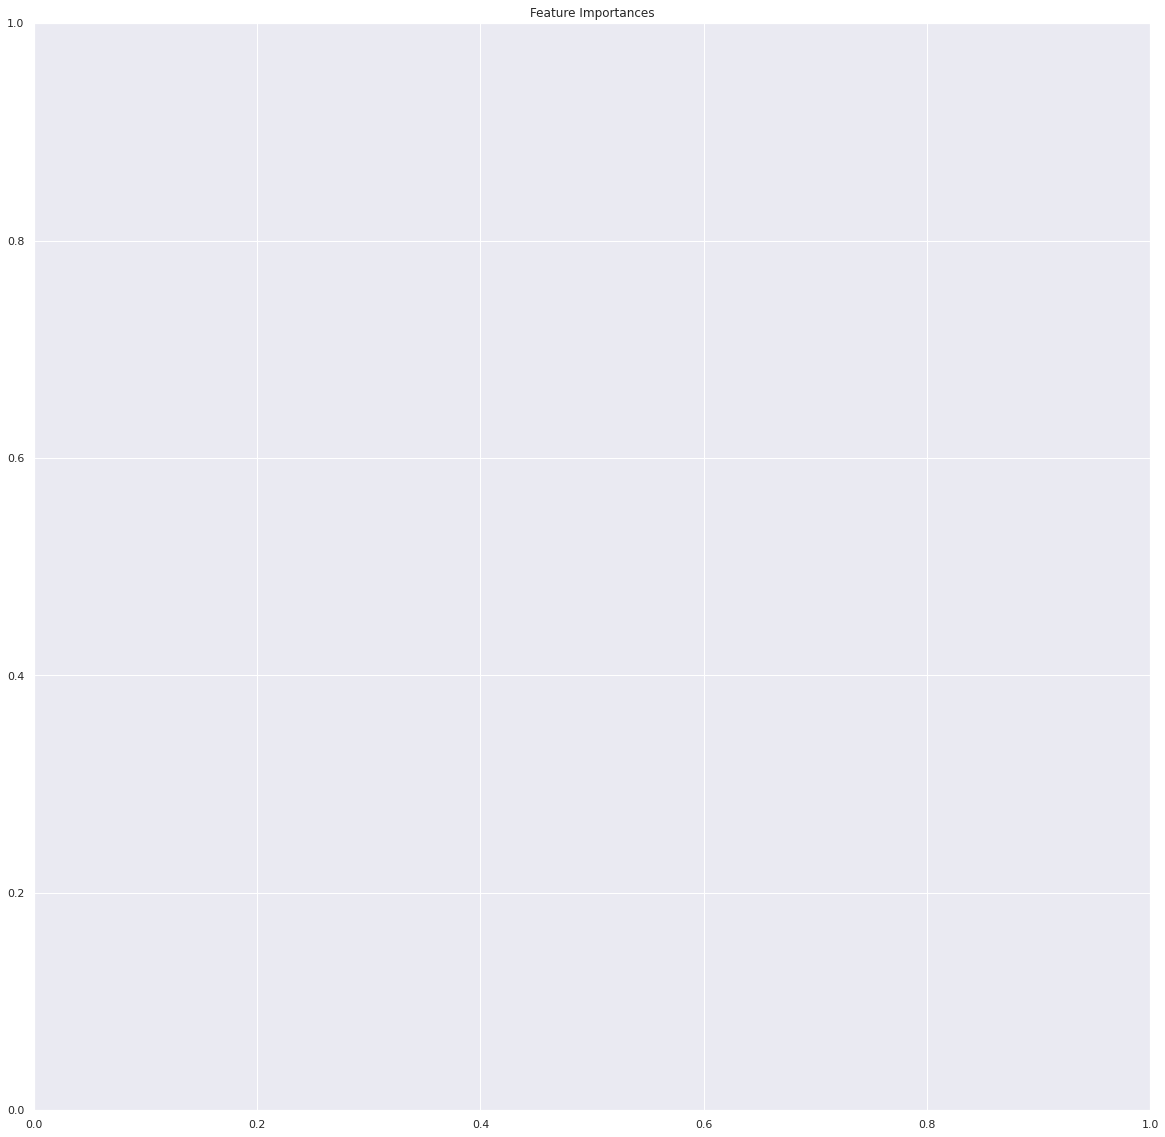

In [ ]:
#from sklearn.ensemble import RandomForestClassifier 
#random_classifier=RandomForestClassifier( n_estimators = 200, criterion = 'entropy', random_state = 0)

#random_classifier.fit(x,y)

#importances = random_classifier.feature_importances_

print(importances)
features_label = train.columns[1:]
indices = np. argsort(importances)[::-1]
for i in range(x.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()




In [ ]:
#logistics

from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, 
                            random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)


Logistic.fit(x, y)

y_pred = Logistic.predict(X_test)

# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=2,
                   warm_start=False)

In [ ]:
from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, 
                            random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)


Logistic.fit(x, y)

coef1=Logistic.coef_[0]
print(coef1)
print(Logistic.intercept_)

pd.DataFrame(coef1, 
             x.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)


[LibLinear][ 2.16005292e+01 -4.10146265e-04 -1.12907624e-01  0.00000000e+00
  4.29161184e-06 -1.99913643e-05 -7.78544127e-02 -3.39242458e-03
  0.00000000e+00 -5.08447469e-03 -1.74163993e-01]
[-4.97538892]


,coef
seriousdlqin2yrs,21.600529
debtratio,0.000004
numberoftime3059dayspastduenotworse,0.000000
numberrealestateloansorlines,0.000000
monthlyincome,-0.000020
revolvingutilizationofunsecuredlines,-0.000410
numberoftimes90dayslate,-0.003392
numberoftime6089dayspastduenotworse,-0.005084
numberofopencreditlinesandloans,-0.077854
age,-0.112908


In [ ]:
Logistic.summary()

AttributeError: ignored